In [2]:
import pandas_datareader.data as web
import datetime
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# set start and end dates
start = datetime.datetime(1919, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
IP = web.DataReader("IPB50001N", "fred", start, end) 
gdp = web.DataReader("GDPC1", "fred", start, end) 
cons = web.DataReader("PCECC96", "fred", start, end) 
invest = web.DataReader("GPDIC1", "fred", start, end) 
invest = web.DataReader("GPDIC1", "fred", start, end)
deflator = web.DataReader("GDPDEF", "fred", start, end)

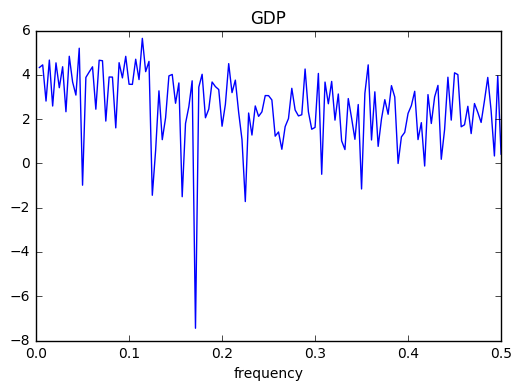

In [9]:
#spectral density of gdp
gdpfreq, gdpper = sig.periodogram(gdp, axis=0)
plt.plot(gdpfreq[1:], np.log(gdpper[1:]))
plt.title('GDP')
plt.xlabel('frequency')
plt.show()

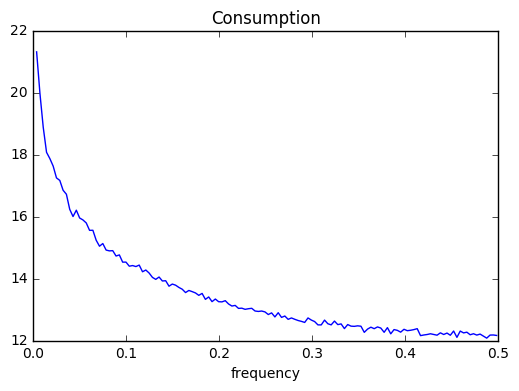

In [8]:
#spectral density of gdp
consfreq, consper = sig.periodogram(cons, axis=0)
plt.plot(consfreq[1:], np.log(consper[1:]))
plt.title('Consumption')
plt.xlabel('frequency')
plt.show()

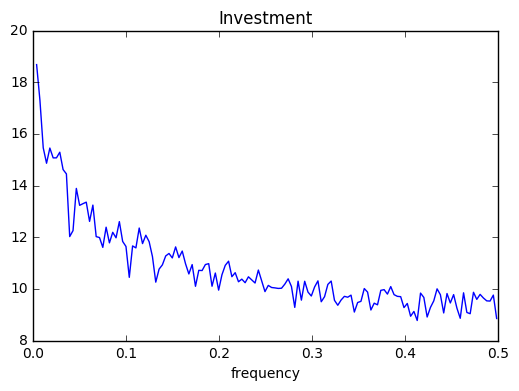

In [11]:
#spectral density of invsetment
infreq, inper = sig.periodogram(invest, axis=0)
plt.plot(infreq[1:], np.log(inper[1:]))
plt.title('Investment')
plt.xlabel('frequency')
plt.show()

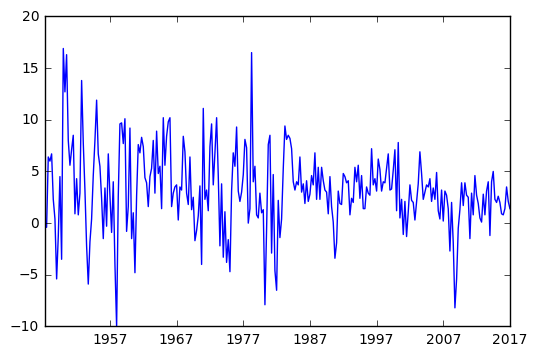

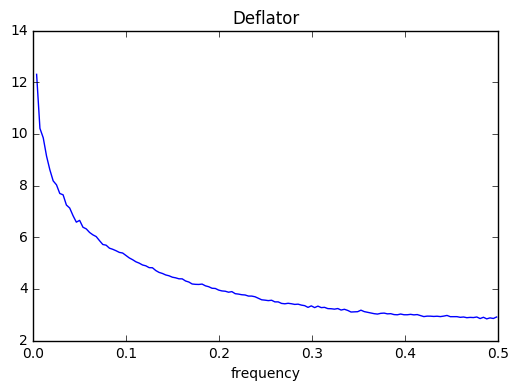

In [14]:
#spectral density of gdp
defreq, deper = sig.periodogram(deflator, axis=0)
plt.plot(defreq[1:], np.log(deper[1:]))
plt.title('Deflator')
plt.xlabel('frequency')
plt.show()

## Ex 4.

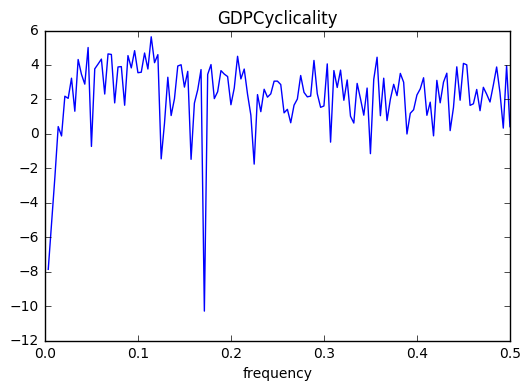

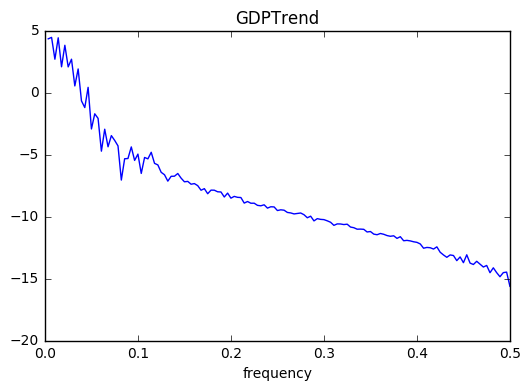

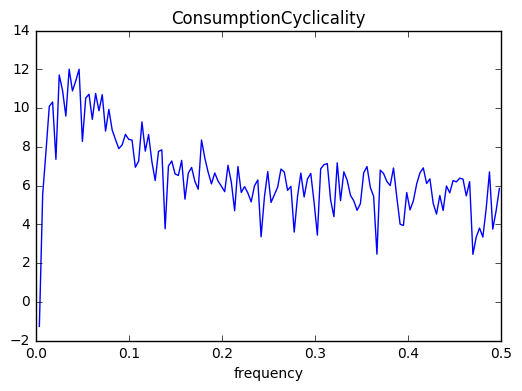

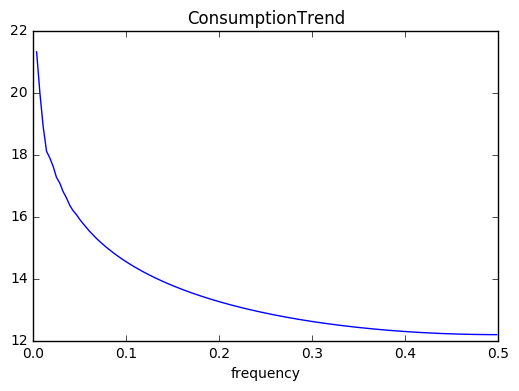

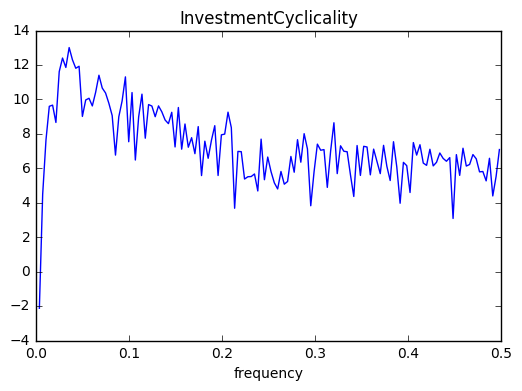

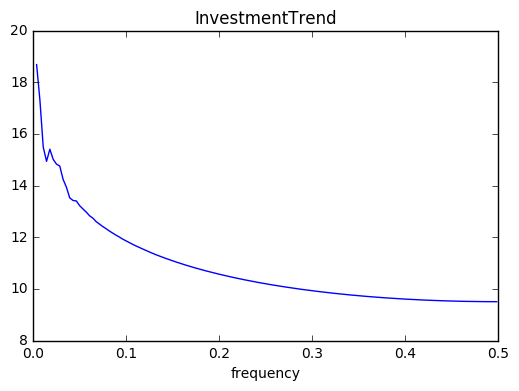

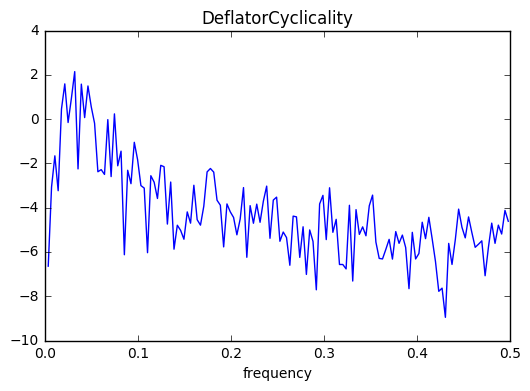

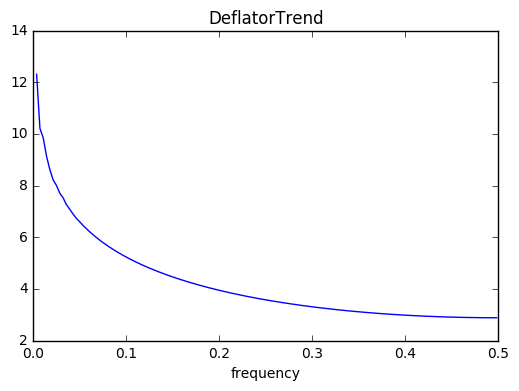

In [15]:
series = [gdp, cons, invest, deflator]
name = ['GDP', 'Consumption', 'Investment', 'Deflator']
for i, data in enumerate(series):
    datacy, datatr = sm.tsa.filters.hpfilter(data, 1600)
    cyfreq, cyper = sig.periodogram(datacy, axis=0)
    trfreq, trper = sig.periodogram(datatr, axis=0)
    plt.plot(cyfreq[1:], np.log(cyper[1:]))
    plt.title(name[i] + 'Cyclicality')
    plt.xlabel('frequency')
    plt.show()
    plt.plot(trfreq[1:], np.log(trper[1:]))
    plt.title(name[i] + 'Trend')
    plt.xlabel('frequency')
    plt.show()

## Ex5.

In [54]:
stats_dict = {}
lambdas = [100, 400, 1600, 6400, 25600]
for i, data in enumerate(series):
    data_dict = {}
    for j, lamb in enumerate(lambdas):
        gdpcy, gdptr = sm.tsa.filters.hpfilter(gdp, lamb)
        lamb_dict = {}
        datacy, datatr = sm.tsa.filters.hpfilter(data, lamb)
        datastd = datacy.std()
        dataauto = datacy.iloc[0:-1, 0].corr(datacy.iloc[1:, 0])
        datacor = datacy.iloc[:, 0].corr(gdpcy.iloc[:, 0])
        lamb_dict['std'] = datastd
        lamb_dict['autocorrelation'] = dataauto
        lamb_dict['correlation'] = datacor
        data_dict[lamb] = lamb_dict
    stats_dict[name[i]] = data_dict

In [55]:
stats_dict

{'Consumption': {100: {'autocorrelation': 1.0,
   'correlation': 0.25492123443901404,
   'std': PCECC96    32.147807
   dtype: float64},
  400: {'autocorrelation': 1.0,
   'correlation': 0.21565597243377033,
   'std': PCECC96    45.842767
   dtype: float64},
  1600: {'autocorrelation': 1.0,
   'correlation': 0.17825500488279869,
   'std': PCECC96    61.62771
   dtype: float64},
  6400: {'autocorrelation': 1.0,
   'correlation': 0.1314313137479356,
   'std': PCECC96    83.430466
   dtype: float64},
  25600: {'autocorrelation': 0.99999999999999989,
   'correlation': 0.094562627896725801,
   'std': PCECC96    111.256568
   dtype: float64}},
 'Deflator': {100: {'autocorrelation': 1.0,
   'correlation': -0.15461314591368719,
   'std': GDPDEF    0.158103
   dtype: float64},
  400: {'autocorrelation': 0.99999999999999989,
   'correlation': -0.17639070623348535,
   'std': GDPDEF    0.244891
   dtype: float64},
  1600: {'autocorrelation': 1.0,
   'correlation': -0.16991079931090189,
   'std': G

pandas.core.series.Series

AttributeError: 'DataFrame' object has no attribute 'to_series'

In [56]:
cons.iloc[:, 0].corr(gdp.iloc[:, 0])

-0.18641319498652945

In [59]:
gdp

,A191RL1Q225SBEA
DATE,
1947-04-01,-0.4
1947-07-01,-0.4
1947-10-01,6.4
1948-01-01,6.0
1948-04-01,6.7
1948-07-01,2.3
1948-10-01,0.4
1949-01-01,-5.4
1949-04-01,-1.3
